# Importing the necessary libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

import cv2 
import os
for root, dirs, files in os.walk(".", topdown=False):
   for name in files:
      print(os.path.join(root, name))
   for name in dirs:
      print(os.path.join(root, name))

.\.ipynb_checkpoints\CNN_Pneumonia(ML)-checkpoint.ipynb
.\.ipynb_checkpoints\Pneumonia_Restnet(ML)-checkpoint.ipynb
.\.ipynb_checkpoints\Pneumonia_VGG19(ML)-checkpoint.ipynb
.\hadoop-3.3.1\bin\container-executor
.\hadoop-3.3.1\bin\hadoop
.\hadoop-3.3.1\bin\hadoop.cmd
.\hadoop-3.3.1\bin\hdfs
.\hadoop-3.3.1\bin\hdfs.cmd
.\hadoop-3.3.1\bin\mapred
.\hadoop-3.3.1\bin\mapred.cmd
.\hadoop-3.3.1\bin\oom-listener
.\hadoop-3.3.1\bin\test-container-executor
.\hadoop-3.3.1\bin\yarn
.\hadoop-3.3.1\bin\yarn.cmd
.\hadoop-3.3.1\etc\hadoop\shellprofile.d\example.sh
.\hadoop-3.3.1\etc\hadoop\capacity-scheduler.xml
.\hadoop-3.3.1\etc\hadoop\configuration.xsl
.\hadoop-3.3.1\etc\hadoop\container-executor.cfg
.\hadoop-3.3.1\etc\hadoop\core-site.xml
.\hadoop-3.3.1\etc\hadoop\hadoop-env.cmd
.\hadoop-3.3.1\etc\hadoop\hadoop-env.sh
.\hadoop-3.3.1\etc\hadoop\hadoop-metrics2.properties
.\hadoop-3.3.1\etc\hadoop\hadoop-policy.xml
.\hadoop-3.3.1\etc\hadoop\hadoop-user-functions.sh.example
.\hadoop-3.3.1\etc\hadoop\

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Resize all images to 256x256

In [2]:
labels = ['no_pneumonia', 'pneumonia']
img_size = 256
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img) , cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

# Load the dataset

In [3]:
train = get_training_data('C:/Users/Computing/Desktop/lukman/train')
test = get_training_data('C:/Users/Computing/Desktop/lukman/test')
val = get_training_data('C:/Users/Computing/Desktop/lukman/val')



<ipython-input-2-dd63476c6ed9>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


# Plot the number of training observations for each class

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

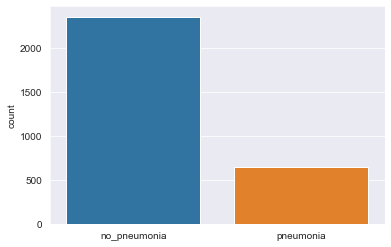

In [4]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("no_pneumonia")
    else:
        l.append("pneumonia")
sns.set_style('darkgrid')
sns.countplot(l)


# Display 1 image for each class

Text(0.5, 1.0, 'pneumonia')

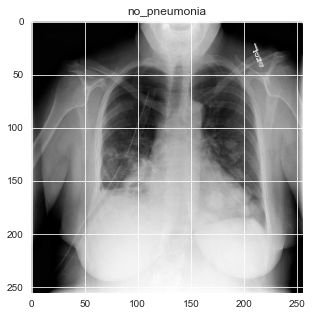

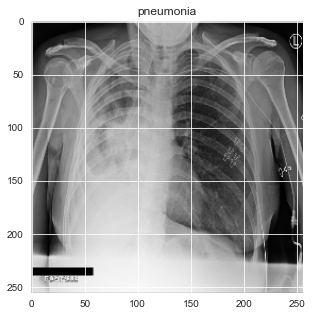

In [5]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

# Get labels and images for each test/train and validation set

In [6]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

print(len(x_train))
print(len(y_train))
print(len(x_val))
print(len(y_val))
print(len(x_test))
print(len(y_test))

3000
3000
500
500
500
500


# Perform a grayscale normalization so that CNN converges faster on [0 to 1] data than on [0 to 255].

In [7]:
from keras.applications.vgg19 import VGG19
from keras.models import Model

vgg19 = VGG19(input_shape=[224,224,3], weights='imagenet', include_top=False)
for layer in vgg19.layers:
    layer.trainable = False
X = Flatten()(vgg19.output) 
output = Dense(2, activation='softmax')(X) 
model = Model(inputs=vgg19.input, outputs=output)


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) 


train_dir = 'C:/Users/Computing/Desktop/lukman/train'
testing_dir = 'C:/Users/Computing/Desktop/lukman/test'
valid_dir = 'C:/Users/Computing/Desktop/lukman/val'


train_datagen = ImageDataGenerator(rescale = 1./255)
train_data = train_datagen.flow_from_directory(train_dir,                      
                                               target_size = (224, 224),      
                                               batch_size = 32,
                                               class_mode = 'categorical') 


test_datagen = ImageDataGenerator(rescale = 1./255) 
test_data = test_datagen.flow_from_directory(testing_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


val_datagen = ImageDataGenerator(rescale=1. / 255)
validation_generator = val_datagen.flow_from_directory(valid_dir,
                                                       target_size=(224, 224),
                                                       batch_size=32,
                                                       class_mode='categorical')

history = model.fit(train_data,validation_data=test_data,epochs=10) 

80134624/80134624 [==============================] - 2s 0us/step
Found 3000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/10
94/94 [==============================] - 380s 4s/step - loss: 0.5904 - accuracy: 0.7597 - val_loss: 0.4897 - val_accuracy: 0.7900
Epoch 2/10
94/94 [==============================] - 404s 4s/step - loss: 0.3925 - accuracy: 0.8257 - val_loss: 0.4378 - val_accuracy: 0.7680
Epoch 3/10
94/94 [==============================] - 411s 4s/step - loss: 0.3431 - accuracy: 0.8493 - val_loss: 0.4658 - val_accuracy: 0.8020
Epoch 4/10
94/94 [==============================] - 506s 5s/step - loss: 0.3379 - accuracy: 0.8480 - val_loss: 0.6220 - val_accuracy: 0.7940
Epoch 5/10
94/94 [==============================] - 485s 5s/step - loss: 0.2847 - accuracy: 0.8820 - val_loss: 0.4584 - val_accuracy: 0.7560
Epoch 6/10
94/94 [==============================] - 482s 5s/step - loss: 0.2558 - accuracy: 0.8920 - val_l

In [13]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# Display test accuracy

In [15]:
print("Loss in the model is - " , model.evaluate(train_data)[0])
print("Accuracy in the model is - " , model.evaluate(train_data)[1]*100 , "%")

94/94 [==============================] - 419s 4s/step - loss: 0.1750 - accuracy: 0.9217
Loss in the model is -  0.17501422762870789
94/94 [==============================] - 417s 4s/step - loss: 0.1750 - accuracy: 0.9217
Accuracy in the model is -  92.166668176651 %


# Display of training and validation accuracy vs testing accuracy and loss

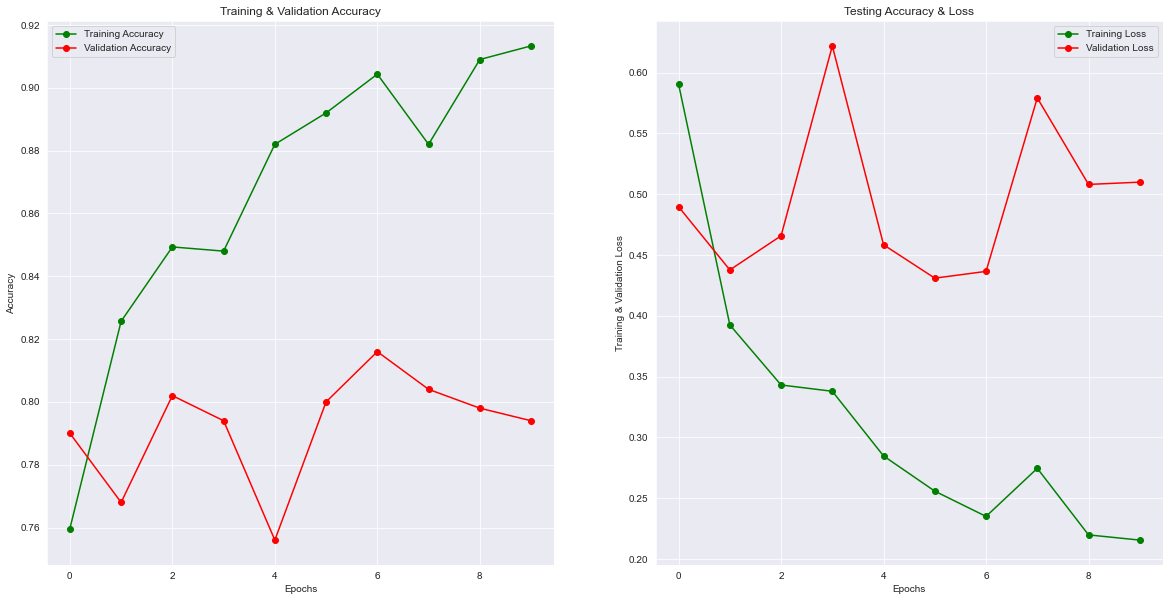

In [16]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()


# Prediction of output labels for test dataset and display of first 12 redictions

In [17]:
predictionss = model.predict(test_data, verbose =1)
predictionss[:12]

16/16 [==============================] - 73s 4s/step


array([[9.9627233e-01, 3.7276754e-03],
       [9.9331409e-01, 6.6858935e-03],
       [4.1529298e-01, 5.8470702e-01],
       [9.9810588e-01, 1.8941388e-03],
       [9.9987614e-01, 1.2388243e-04],
       [9.9702245e-01, 2.9774860e-03],
       [9.6691608e-01, 3.3083886e-02],
       [9.9290752e-01, 7.0925057e-03],
       [8.3734560e-01, 1.6265438e-01],
       [9.9898523e-01, 1.0147436e-03],
       [8.1864750e-01, 1.8135250e-01],
       [6.3344246e-01, 3.6655757e-01]], dtype=float32)

## TP, FP, FN and TN values

In [18]:
y_pred = np.argmax(predictionss, axis=1)
cm = confusion_matrix(validation_generator.classes,y_pred)
cm

print('='*50)                                
print('True Positive  (TP) = ', cm[0][0])
print('False Positive (FP) = ', cm[0][1])
print('False Negative (FN) = ', cm[1][0])
print('True Negative  (TN) = ', cm[1][1])
#cm = confusion_matrix(y_test,predictions)
#cm

True Positive  (TP) =  366
False Positive (FP) =  24
False Negative (FN) =  104
True Negative  (TN) =  6


In [19]:
if (cm[0][0] + cm[0][1])!=0 and (cm[0][0], cm[1][0])!=0:
      precision= round((cm[0][0] / (cm[0][0] + cm[0][1]))*100, 2) 
      recall   = round((cm[0][0] / (cm[0][0] + cm[1][0]))*100, 2) 
      f1_score = round(2*((precision*recall)/(precision+recall)), 2)       
      print(f'Precision Score: {precision}%')
      print(f'Recall Score: {recall}%')
      print(f'F1 Score: {f1_score}%')
      print('='*50) 
      print('\n')

Precision Score: 93.85%
Recall Score: 77.87%
F1 Score: 85.12%




# Classification report

In [20]:
print(classification_report(validation_generator.classes, y_pred, target_names = ['No_Pneumonia (Class 0)','Pneumonia (Class 1)']))

                        precision    recall  f1-score   support

No_Pneumonia (Class 0)       0.78      0.94      0.85       390
   Pneumonia (Class 1)       0.20      0.05      0.09       110

              accuracy                           0.74       500
             macro avg       0.49      0.50      0.47       500
          weighted avg       0.65      0.74      0.68       500



# Confusiuon Matrix Plot

<AxesSubplot:>

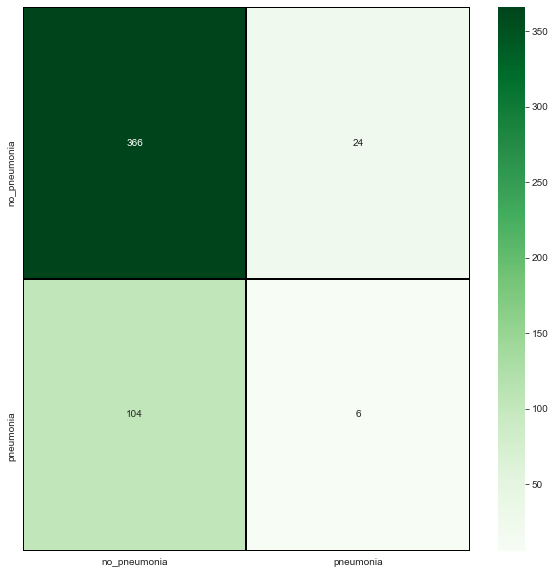

In [29]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Greens", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

# Visualization showing separate correct and incorrect predictions

(500, 224, 224, 3)
(500, 2)


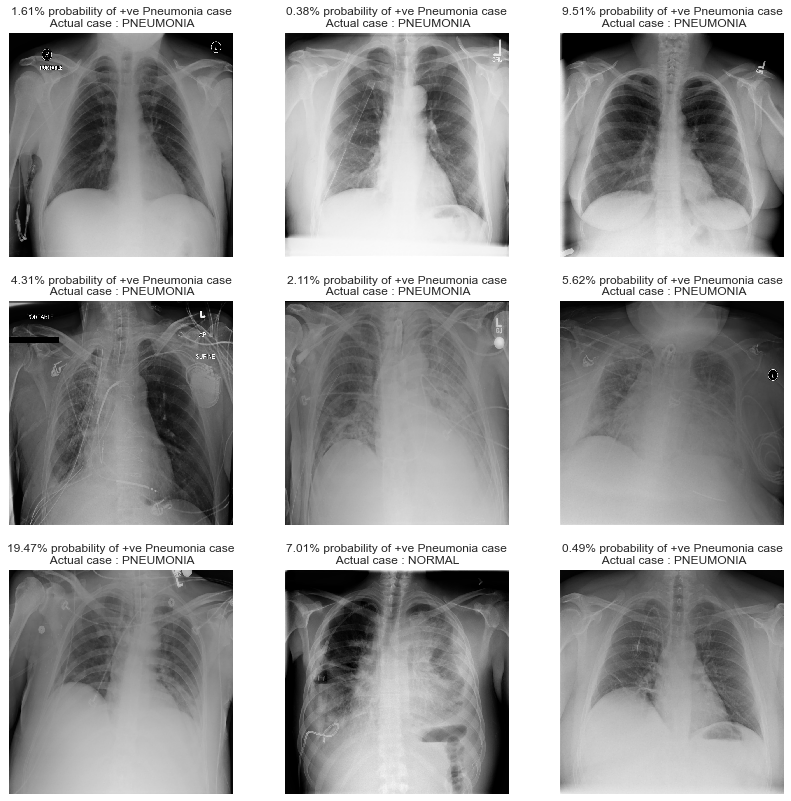

In [22]:
test_data.reset()
x=np.concatenate([test_data.next()[0] for i in range(test_data.__len__())])
y=np.concatenate([test_data.next()[1] for i in range(test_data.__len__())])

print(x.shape)
print(y.shape)

dic = {0:'NORMAL', 1:'PNEUMONIA'}
plt.figure(figsize=(14, 14))
for i in range(0+224, 9+224):
    plt.subplot(3, 3, (i-224)+1)
    if predictionss[i, 0] >= 0.5: 
        out = ('{:.2%} probability of +ve Pneumonia case'.format(predictionss[i][1]))    
    else: 
        out = ('{:.2%} probability of having Normal case'.format(1-predictionss[i][1]))
    plt.title(out+"\n Actual case : "+ dic.get(y[i][0])) 
    plt.imshow(np.squeeze(x[i]))
    plt.axis('off')
plt.show()
